In [2]:
!pip install mxnet
#pip install gluonts

     |████████████████████████████████| 68.7MB 62kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
#import gluonts
import mxnet

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
%cd '/content/gdrive/My Drive'


/content/gdrive/My Drive


In [0]:
import csv
row_num = 0

watts = []
time_stamps =[]

with open('CD_INTERVAL_READING_ALL_NO_QUOTES.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  for row in reader:
    row_num = row_num+1
    #print(row[0])
    sdata = row[1]
    tsplit = sdata.split(',')
    if row_num==1:
      continue
    #print(row[1])
    #print(tsplit[3])
    ntsplit = float(tsplit[3])
    watts.append(ntsplit)
    time_stamps.append(tsplit[0])
    #print(row[2])
    #print(row[3])
    #print(row[4])
    if row_num > 80000:
      break

In [0]:
# step 1
import pandas as pd
caisofile= 'CaisoJan19March19windsolarAvg.csv'
caiso_dataset = pd.read_csv(caisofile)

In [0]:
import pandas as pd 
newengland = 'NewEnglandNov19WindSolar.csv'
neweng_dataset = pd.read_csv(newengland)

In [0]:
# step 1 b
#caiso_dataset=caiso_dataset.rename(columns={"ws_forecast (avg) (california_iso)": "iso"})

# step 1 b
neweng_dataset =neweng_dataset.rename(columns={"ws_forecast (sum) (california_iso)": "iso"})


In [8]:
neweng_dataset.head()
#caiso_dataset.head()

,DateTime,ws_forecast (sum) (california_iso)
0,2019-11-01 00:00:00,-12
1,2019-11-01 01:00:00,-12
2,2019-11-01 02:00:00,-12
3,2019-11-01 03:00:00,-12
4,2019-11-01 04:00:00,-12


In [0]:
neweng_array = neweng_dataset['iso']

In [40]:
np.max(neweng_array)

8542

In [0]:
normalized_neweng = neweng_dataset
# normalize new eng dataframe
ne_max = neweng_dataset['iso'].max()
#print(ne_max)
ne_min = neweng_dataset['iso'].min()
normalized_neweng['iso'] = (neweng_dataset['iso'] - ne_min)/(ne_max - ne_min)


In [10]:
normalized_neweng.tail()

,DateTime,iso
669,2019-11-29 19:00:00,0.008782
670,2019-11-29 20:00:00,0.008782
671,2019-11-29 21:00:00,0.008782
672,2019-11-29 22:00:00,0.008782
673,2019-11-29 23:00:00,0.008782


In [0]:
# step 1 c
from gluonts.dataset.common import ListDataset

training_data_caiso = ListDataset(
    [{"start": "2019-01-01 00:00:00" , "target": caiso_dataset.iso.values}],
    freq = "1H"
)

In [0]:
from gluonts.dataset.common import ListDataset
training_data_neweng = ListDataset([{"start":"2019-11-01 00:00:00", "target": neweng_dataset.iso.values
                                     }], freq = "1H")

norm_training_data_neweng = ListDataset([{"start":"2019-11-01 00:00:00", "target": normalized_neweng.iso.values
                                     }], freq = "1H")

In [8]:
# new eng test dataset
test_NE = neweng_dataset[100:150]

test_NE.head()

norm_test_NE = normalized_neweng[100:160]

norm_test_NE.head()

# shorter sequence

# longer sequence

,DateTime,iso
100,2019-11-05 17:00:00,0.008898
101,2019-11-05 18:00:00,0.008667
102,2019-11-05 19:00:00,0.008667
103,2019-11-05 20:00:00,0.008667
104,2019-11-05 21:00:00,0.008667


In [0]:
# new england test dataset listdataset
test_NE_dataset = ListDataset(
    [{"start": "2019-11-05 17:00:00" , "target": test_NE.iso.values}],
    freq = "1H"
)

norm_test_NE_dataset = ListDataset(
    [{"start": "2019-11-05 17:00:00" , "target": norm_test_NE.iso.values}],
    freq = "1H"
)

In [0]:
caiso_array = caiso_dataset['iso']

In [3]:
caiso_array[1]

NameError: ignored

pd random sampling rows: https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/


In [0]:
# step 1 d

# make a new dataframe for testing data ? 

# sample method 0: random; 
test_caiso_1 = caiso_dataset.sample(n = 30)  

# sample method 1 : sample every k rows; sample n cons. rows every k rows
k = 3
test_caiso_2 = caiso_dataset.iloc[::k, :]

test_caiso_3 = caiso_dataset[2:32]

train_caiso_2 = caiso_dataset[10:100]

# sample method 2: seasons / hour of day

# sample method 3: based on paper

# testing_data_caiso = ListDataset()

In [0]:
train_caiso_2.head()

training_data_caiso2 = ListDataset(
    [{"start": "2019-01-01 10:00:00" , "target": train_caiso_2.iso.values}],
    freq = "1H"
)

In [18]:
test_caiso_3.head()

,DateTime,iso
2,2019-01-01 02:00:00,-2.333
3,2019-01-01 03:00:00,-2.667
4,2019-01-01 04:00:00,-3.000
5,2019-01-01 05:00:00,-1.333
6,2019-01-01 06:00:00,1.000


In [0]:
# automatically extract first row timestamp

In [11]:
test_caiso_2.head()

,DateTime,iso
0,2019-01-01 00:00:00,-2.333
3,2019-01-01 03:00:00,-2.667
6,2019-01-01 06:00:00,1.000
9,2019-01-01 09:00:00,2328.667
12,2019-01-01 12:00:00,2457.667


In [10]:
# step 1 e
test_caiso_1.head()

,DateTime,iso
897,2019-02-07 09:00:00,2721.000
1257,2019-02-22 10:00:00,2852.667
472,2019-01-20 16:00:00,229.000
239,2019-01-10 23:00:00,-5.667
373,2019-01-16 13:00:00,1213.667


In [0]:
# step 1 f 
test_caiso_1_dataset = ListDataset(
    [{"start": "2019-02-07 09:00:00" , "target": test_caiso_1.iso.values}],
    freq = "1H"
)

In [0]:
test_caiso_3_dataset = ListDataset(
    [{"start": "2019-01-01 02:00:00" , "target": test_caiso_3.iso.values}],
    freq = "1H"
)

In [4]:
test_caiso_1 = caiso_dataset.sample(n = 300)  
test_caiso_1 

NameError: ignored

In [0]:
#import numpy as np
#np.random.randint(1, 8)
a = [1,2,3,4,5,6,7,8,9,0]
a[3:3+2]

[4, 5]

In [0]:
# orig sampling method from unsupervised rep learning
def sampling1(y, N, K): # sequence y_i for i in 1 to N
  # size of y
  for i in range(1,N):
    yi = y[i]
    ysize = len(yi)
    # pick sizes s_pos and s_ref - unif at random 
    spos = np.random.randint(1, ysize)
    sref = np.random.randint(spos, ysize) 
    # pick xref, xpos 
    # pick starting index among 0 to (ysize - sref)
    startref = np.random.randint(0, ysize - sref)
    startpos = np.random.randint(0, ysize - spos)
    xref = yi[startref:startref+sref]
    xpos = yi[startpos:startpos+spos]
    xneg= []
    for k in range(1, K): 
      ik = np.random.randint(1, N)
      sneg = np.random.randint(1,len(y[ik]))
      # pick xneg
      startneg = np.random.randint(0, ysize-sneg)
      yk = y[k]
      xneg_k = yk[startneg:sneg]
      xneg.append(xneg_k)
    return( xref, xpos, xneg)

# sampling method var. 1: use different dist. other than uniform dist. to pick 


In [0]:
st = "2019-01-23 04:00:00"

splitst = st.split()

In [0]:
s1 = splitst[1]
ss1 = s1.split(":")

In [8]:
ss1

['04', '00', '00']

In [3]:
f = 4
2 <= 3 <= 5

True

In [0]:
import pandas as pd
sample_df = pd.DataFrame(columns=["date", "iso"])
#sample_df.append("2019-01-23 04:00:00", 445)

In [0]:
s_array= [3,4,5,6]
sample_df["iso"] = s_array

In [0]:
# break the array into k sub-arrays : day of the week

# hour of the day: morning 6 am to 12 pm, afternoon 12 pm to 6 pm, evening 6 pm to 12 am, early morning 12 am to 6 am 

colnames=["DateTime", "iso"]
# define empty dfs 
morningdf = pd.DataFrame(columns=colnames)
afternoondf = pd.DataFrame(columns=colnames)
eveningdf = pd.DataFrame(columns= colnames)
earlymorningdf= pd.DataFrame(columns= colnames)

morning_time = []
morning_iso = []

afternoon_time = []
afternoon_iso = []

evening_time = []
evening_iso = []

earlymorning_time = []
earlymorning_iso = []

for index, row in caiso_dataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = split(date_time)
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    hour= hour_min_sec[0]
    minute = hour_min_sec[1]    
    # determine zone
    if 0 <= hour <= 6:
      earlymorning_time.append(date_time)
      earlymorning_iso.append(iso_val)
    if 6 <= hour <=12:
      morning_time.append(date_time)
      morning_iso.append(iso_val)
    if 12 <= hour <= 18:
      afternoon_time.append(date_time)
      afternoon_iso.append(iso_val)
    if 18 <= hour <= 24:
      evening_time.append(date_time)
      evening_iso.append(iso_val)

# set dataframes

morningdf["DateTime"] = morning_time
morningdf["iso"] = morning_iso
earlymorningdf["DateTime"] = earlymorning_time
earlymorningdf["iso"]=earlymorning_iso
afternoondf["DateTime"] = afternoon_time
afternoondf["iso"] = afternoon_iso
eveningdf["DateTime"] = evening_time
eveningdf["iso"] = evening_iso

# use these as different series to draw xneg 


In [0]:
# extract the first timestamp from each series
morning_first_ts = morning_time[0]
earlymorning_first_ts= earlymorning_time[0]
afternoon_first_ts = afternoon_time[0]
evening_first_ts = evening_time[0]


In [0]:
# google: visualizations in colab

import seaborn as sns
sns.set()


In [0]:
# break into subarrays based on feature 

In [12]:
# test the sampling

xr, xp, xn = sampling1(caiso_array, 20, 5)

TypeError: ignored

In [0]:
import pandas as pd
# dataframe that holds ref, pos, and neg

# create df with col names
column_names = ["xref","xpos","xneg"]
triplet_dataframe = pd.DataFrame(columns = column_names)


In [0]:
caiso_dataset.head()

NameError: ignored

In [0]:
  import mxnet as mx

In [0]:
# step 4
import numpy as np
awatts = np.array(watts)

In [0]:
import gluonts
import pandas as pd

ModuleNotFoundError: ignored

In [0]:
# step 6
from gluonts.dataset.common import ListDataset
start = pd.Timestamp(time_stamps[0], freq="0.5H")

pred_length = 3000
freq="0.5H"

train_ds1 = ListDataset([{'target': x, 'start': start} for x in awatts[:-pred_length]], freq = freq)

test_ds1 = ListDataset([{'target':x, 'start':start} for x in awatts], freq= freq)

In [10]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
estimator = DeepAREstimator(freq="1H", prediction_length=50, trainer=Trainer(epochs=10,batch_size=10))
predictor = estimator.train(training_data=norm_training_data_neweng)

INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 27644
100%|██████████| 50/50 [00:03<00:00, 12.66it/s, avg_epoch_loss=-.336]
INFO:root:Epoch[0] Elapsed time 3.953 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.335649
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.31it/s, avg_epoch_loss=-1.5]
INFO:root:Epoch[1] Elapsed time 3.501 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-1.497371
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.29it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[2] Elapsed time 3.503 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-1.829331
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.31it/s, avg_epoch_loss=-2.09]
INFO:root:Epoch[3] Elapsed time 3.497 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-2.087961
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.29it/s, avg_epoch_loss=-2.

In [0]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
estimator = DeepAREstimator(freq="1H", prediction_length=100, trainer=Trainer(epochs=10,batch_size=10))
predictor = estimator.train(training_data=training_data_caiso )

INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 27644
100%|██████████| 50/50 [00:07<00:00,  6.91it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[0] Elapsed time 7.241 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=6.824201
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.74it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[1] Elapsed time 6.463 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=5.884903
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.72it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[2] Elapsed time 6.484 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=5.575997
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.76it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[3] Elapsed time 6.454 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=5.373884
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.82it/s, avg_epoch_loss=5.24]
INFO

In [0]:
# accuracy of deeparest. 
from gluonts.evaluation.backtest import make_evaluation_predictions

deepare_forecast_it, deepare_ts_it = make_evaluation_predictions(dataset=norm_test_NE_dataset, 
                                                                 predictor=predictor, num_samples=20)

In [0]:
deepare_forecasts = list(deepare_forecast_it)
deepare_tss = list(deepare_ts_it)

In [14]:
from gluonts.evaluation import Evaluator

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(deepare_tss), iter(deepare_forecasts), num_series=len(norm_test_NE_dataset))

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 48.79it/s]


In [15]:
item_metrics.head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,0.255341,15.179162,15.344464,0.306889,0.000051,5911.227129,1.234108,234490.841974,3.057364,0.0,15.179163,0.26,27.134154,0.42


In [0]:
import matplotlib.pyplot as plt

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [0]:
d_ts_entry = deepare_tss[0]
d_forecast_entry= deepare_forecasts[0]

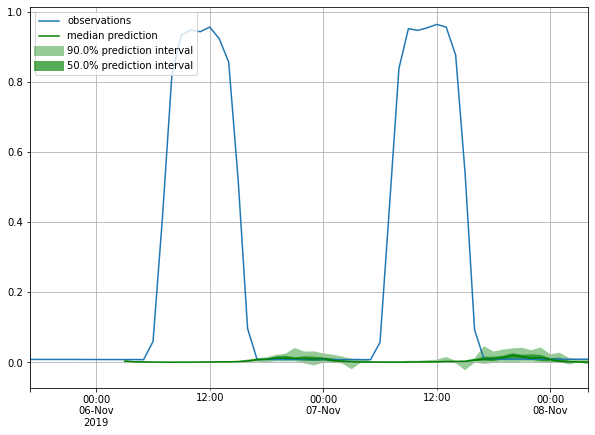

In [22]:
plot_prob_forecasts(d_ts_entry, d_forecast_entry)

In [0]:
len(train_ds1)

77000

gluon loss various functions 


In [21]:
import mxnet
from mxnet.gluon import nn, loss as gloss

import mxnet as mx
import mxnet.ndarray as nd
from mxnet import nd, autograd, gluon
from mxnet.gluon.data.vision import transforms

# L2 Loss
loss2 = gloss.L2Loss()

# sample data 
x = nd.ones((2,))
y = nd.ones((2,)) * 2
loss2(x, y)

# Huber loss
loss_huber = gloss.HuberLoss(rho=0.85) # threshold rho 

loss = gloss.SoftmaxCrossEntropyLoss()
x = nd.array([[1, 10], [8, 2]])
y = nd.array([0, 1])
loss(x, y)


[9.000123  6.0024757]
<NDArray 2 @cpu(0)>

In [14]:
xh = nd.array([1,2,3,4,5])
yh = nd.array([2,2,3,4,5])
loss_huber(xh, yh)


[0.575 0.    0.    0.    0.   ]
<NDArray 5 @cpu(0)>

In [20]:
alen

3

In [26]:
from scipy.linalg import norm
from numpy import array
v4= [3,4,5,6]
v3 = [1,1,1,1]
norm(array(v4- v3), 2)

TypeError: ignored

In [1]:
a= [1,2,3,4,5,6]
a[2:4]

[3, 4]

In [0]:
# procedure to choose xneg by sampling from other subseries 


other_subseries = [morningdf, earlymorningdf, afternoondf]
# choose one subseries at random
number_other = 3

def choose_xneg(alength): # returns array of length alength
    rand_num = random.randint(0, number_other-1)
    target_neg_df = other_subseries[rand_num]
    # sample of length alength
    negarray = target_neg_df['iso']
    len_negarray = len(negarray)
    start = np.random.randint(0, len_negarray - alength)
    return negarray[start:start+alength]




In [0]:
#from scipy.linalg import norm

# triplet loss compute
def compute_triplet_loss( xpos, xneg, pred):
  margin = -0.25
  array_len = len(xpos)
  tot = 0
  for i in range(0, array_len):
    #ppos = norm(xpos[i] - pred[i], 2)
    ppos = pow(xpos[i] - pred[i], 2)
    pneg = pow(xneg[i]- pred[i], 2)
    tot = tot+ np.max(ppos - pneg + margin, 0)
  return tot



In [0]:

# custom step 1
from gluonts.model.estimator import GluonEstimator
from gluonts.model.predictor import Predictor, RepresentableBlockPredictor
from gluonts.core.component import validated
from gluonts.trainer import Trainer 
from gluonts.support.util import copy_parameters
from gluonts.transform import ExpectedNumInstanceSampler, Transformation, InstanceSplitter
from mxnet.gluon import HybridBlock 
from mxnet import gluon
from gluonts.dataset.field_names import FieldName

from mxnet.gluon import nn, loss as gloss
import mxnet as mx
import mxnet.ndarray as nd
from mxnet import nd, autograd, gluon
from mxnet.gluon.data.vision import transforms

In [25]:
# custom step 1 b
class MyNetwork(gluon.HybridBlock):
    def __init__(self, prediction_length, num_cells, **kwargs):
        super().__init__(**kwargs)
        self.prediction_length = prediction_length
        self.num_cells = num_cells
    
        with self.name_scope():
            # Set up a 4 layer neural network that directly predicts the target values
            self.nn = mx.gluon.nn.HybridSequential()
            self.nn.add(mx.gluon.nn.Dense(units=self.num_cells, activation='relu'))
            self.nn.add(mx.gluon.nn.Dense(units=self.num_cells, activation='relu'))
            self.nn.add(mx.gluon.nn.Dense(units=self.num_cells, activation='relu'))
            self.nn.add(mx.gluon.nn.Dense(units=self.prediction_length, activation='softrelu'))

class MyTrainNetwork1(MyNetwork):    
    def hybrid_forward(self, F, past_target, future_target): # add input 
        prediction = self.nn(past_target)
        # calculate L1 loss with the future_target to learn the median

        # change the loss 
        plen = len(prediction)

        #print("len prediction is,", plen)
        #print("prediction is,", prediction)
        #print("future target is,", future_target)

        # change loss 
        # L2 loss
        loss2 = gloss.L2Loss()
        # huber loss
        loss_huber = gloss.HuberLoss(rho=0.85)
        hloss= loss_huber( nd.array(prediction), nd.array(future_target))
        # randomly choose xneg 
        
        return (prediction - future_target).abs().mean(axis=-1)
        #return hloss
        

class MyPredNetwork1(MyTrainNetwork1):
    # The prediction network only receives past_target and returns predictions
    def hybrid_forward(self, F, past_target):
        prediction = self.nn(past_target)
        return prediction.expand_dims(axis=1)

class MyEstimator1(GluonEstimator):
  @validated()
  def __init__(
      self,
      prediction_length:int,
      context_length:int,
      freq:str,
      num_cells:int,
      trainer: Trainer=Trainer()
  ) -> None:
      super().__init__(trainer=trainer)
      self.prediction_length = prediction_length
      self.context_length = context_length
      self.freq = freq
      self.num_cells = num_cells
  def create_transformation(self):
    return InstanceSplitter(
                    target_field=FieldName.TARGET,
                    is_pad_field=FieldName.IS_PAD,
                    start_field=FieldName.START,
                    forecast_start_field=FieldName.FORECAST_START,
                    train_sampler=ExpectedNumInstanceSampler(num_instances=1),
                    past_length=self.context_length,
                    future_length=self.prediction_length
                )
  def create_training_network(self) -> MyTrainNetwork1:
    return MyTrainNetwork1(
        prediction_length = self.prediction_length,
        num_cells= self.num_cells
    )
  def create_predictor(self, transformation:Transformation, trained_network: HybridBlock) -> Predictor:
    prediction_network = MyPredNetwork1(
        prediction_length= self.prediction_length,
        num_cells = self.num_cells
    )

    copy_parameters(trained_network, prediction_network)

    return RepresentableBlockPredictor(
        input_transform=transformation,
        prediction_net=prediction_network,
        batch_size = self.trainer.batch_size,
        freq = self.freq,
        prediction_length = self.prediction_length,
        ctx=self.trainer.ctx
    )

INFO:root:Using CPU


In [27]:
# custom step 1 c

from gluonts.distribution.distribution_output import DistributionOutput
from gluonts.distribution.gaussian import GaussianOutput

def kl_divergence(dist_a, dist_b):
    # add batch dimension
    pred_batch = mx.nd.array(dist_a).expand_dims(0)
    target_batch = mx.nd.array(dist_b).expand_dims(0)
    # log the distribution
    pred_batch = pred_batch.log()
    # create loss (assuming we have a logged prediction distribution)
    loss_fn = mx.gluon.loss.KLDivLoss(from_logits=True)
    divergence = loss_fn(pred_batch, target_batch)
    return divergence.asscalar()

class MyProbNetwork(gluon.HybridBlock):
    def __init__(self,
                 prediction_length,
                 distr_output,
                 num_cells,
                 num_sample_paths=10,
                 **kwargs
    ) -> None:
        super().__init__(**kwargs)
        self.prediction_length = prediction_length
        self.distr_output = distr_output
        self.num_cells = num_cells
        self.num_sample_paths = num_sample_paths
        self.proj_distr_args = distr_output.get_args_proj()

        with self.name_scope():
            # Set up a 3 layer neural network that its ouput will be projected to the distribution parameters
            self.nn = mx.gluon.nn.HybridSequential()
            self.nn.add(mx.gluon.nn.Dense(units=self.num_cells, activation='relu'))
            self.nn.add(mx.gluon.nn.Dense(units=self.num_cells, activation='relu'))
            self.nn.add(mx.gluon.nn.Dense(units=self.prediction_length * self.num_cells, activation='relu'))


class MyProbTrainNetwork(MyProbNetwork):
    def hybrid_forward(self, F, past_target, future_target):
        # compute network output
        net_output = self.nn(past_target)

        # (batch, prediction_length * nn_features)  ->  (batch, prediction_length, nn_features)
        net_output = net_output.reshape(0, self.prediction_length, -1)

        # project network output to distribution parameters domain
        distr_args = self.proj_distr_args(net_output)

        #print("dist args,", distr_args)
        # compute distribution
        distr = self.distr_output.distribution(distr_args)

        # print dist
        #print("dist,", distr)
        # negative log-likelihood
        
        loss = distr.loss(future_target)
        #print("loss",loss)
        
        #xdistr = distr.

        # another loss 
        smloss = gloss.SoftmaxCrossEntropyLoss()
        sloss = smloss(loss, future_target)
        print("loss",loss)

        # KL div

        return loss


class MyProbPredNetwork(MyProbTrainNetwork):
    # The prediction network only receives past_target and returns predictions
    def hybrid_forward(self, F, past_target):
        # repeat past target: from (batch_size, past_target_length) to
        # (batch_size * num_sample_paths, past_target_length)
        repeated_past_target = past_target.repeat(
            repeats=self.num_sample_paths, axis=0
        )

        # compute network output
        net_output = self.nn(repeated_past_target)

        # (batch * num_sample_paths, prediction_length * nn_features)  ->  (batch * num_sample_paths, prediction_length, nn_features)
        net_output = net_output.reshape(0, self.prediction_length, -1)

        # project network output to distribution parameters domain
        distr_args = self.proj_distr_args(net_output)

        # compute distribution
        distr = self.distr_output.distribution(distr_args)

        # get (batch_size * num_sample_paths, prediction_length) samples
        samples = distr.sample()

        # reshape from (batch_size * num_sample_paths, prediction_length) to
        # (batch_size, num_sample_paths, prediction_length)
        return samples.reshape(shape=(-1, self.num_sample_paths, self.prediction_length))

class MyProbEstimator(GluonEstimator):
    @validated()
    def __init__(
            self,
            prediction_length: int,
            context_length: int,
            freq: str,
            distr_output: DistributionOutput,
            num_cells: int,
            num_sample_paths: int = 100,
            trainer: Trainer = Trainer()
    ) -> None:
        super().__init__(trainer=trainer)
        self.prediction_length = prediction_length
        self.context_length = context_length
        self.freq = freq
        self.distr_output = distr_output
        self.num_cells = num_cells
        self.num_sample_paths = num_sample_paths

    def create_transformation(self):
        return InstanceSplitter(
            target_field=FieldName.TARGET,
            is_pad_field=FieldName.IS_PAD,
            start_field=FieldName.START,
            forecast_start_field=FieldName.FORECAST_START,
            train_sampler=ExpectedNumInstanceSampler(num_instances=1),
            past_length=self.context_length,
            future_length=self.prediction_length,
        )

    def create_training_network(self) -> MyProbTrainNetwork:
        return MyProbTrainNetwork(
            prediction_length=self.prediction_length,
            distr_output=self.distr_output,
            num_cells=self.num_cells,
            num_sample_paths=self.num_sample_paths
        )

    def create_predictor(
            self, transformation: Transformation, trained_network: HybridBlock
    ) -> Predictor:
        prediction_network = MyProbPredNetwork(
            prediction_length=self.prediction_length,
            distr_output=self.distr_output,
            num_cells=self.num_cells,
            num_sample_paths=self.num_sample_paths
        )

        copy_parameters(trained_network, prediction_network)

        return RepresentableBlockPredictor(
            input_transform=transformation,
            prediction_net=prediction_network,
            batch_size=self.trainer.batch_size,
            freq=self.freq,
            prediction_length=self.prediction_length,
            ctx=self.trainer.ctx,
        )

INFO:root:Using CPU


In [0]:
# custom 1c 2 

# modify MyProbTrainNetwork class 


# link: https://github.com/awslabs/gluon-ts/blob/master/src/gluonts/model/transformer/_network.py
# custom 1 d
# add subseries to the definition

class MyRepNetwork(gluon.HybridBlock): # representation network
# samples_output instead of distr_output
  def __init__(self, prediction_length, samples_output, num_cells, num_sample_paths=10, lags_seq: List[int], **kwargs
               ) -> None:
               super().__init__(**kwargs)
               self.prediction_length=prediction_length
               self.samples_output= samples_output
               self.num_cells= num_cells
               self.num_sample_paths = num_sample_paths
               # self.proj_distr_args = distr_output.get_args_proj()

               with self.name_scope():
   

In [0]:
# probabilistic rnn -> covariates into it

In [0]:
# prob estimator

pred_length = 10

# num_cells: number of cells for ea layer

prob_estimator = MyProbEstimator(
    prediction_length=pred_length,
    context_length=2*pred_length,
    freq="1H",
    distr_output=GaussianOutput(),
    num_cells=10,
    trainer=Trainer(ctx="cpu",
                    epochs=10,
                    learning_rate=1e-4,
                    hybridize=False,
                    num_batches_per_epoch=10
                   )
)


NameError: ignored

In [0]:


import mxnet as mx
# prob estimator train
prob_predictor = prob_estimator.train(norm_training_data_neweng)

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.0001
  0%|          | 0/10 [00:00<?, ?it/s]

In [0]:
test_caiso_3_dataset

In [0]:
# artificial 
from gluonts.dataset.artificial import ComplexSeasonalTimeSeries
from gluonts.dataset.common import ListDataset

artificial_data = ComplexSeasonalTimeSeries(
    num_series=10,
    prediction_length=20, 
    freq_str="H",
    length_low=30,
    length_high=200,
    min_val=-10,
    max_val=1000,
    is_integer=False,
    proportion_missing_values=0
)


TypeError: ignored

In [0]:
train_artificial = ListDataset(artificial_data.train, freq=artificial_data.metadata.freq)
test_artificial = ListDataset(artificial_data.test,freq = artificial_data.metadata.freq)


In [0]:
pred_artificial = estimator1.train(train_artificial)

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/20 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


Exception: ignored

In [0]:
#train_series = to_pandas()

In [49]:
# custom 1b -> next step 
# custom step 2 b

import mxnet as mx
pred_length = 20
estimator1 = MyEstimator1(prediction_length= pred_length, context_length=2*pred_length, freq="1H",num_cells=10, trainer=Trainer(ctx="cpu", epochs=5, learning_rate=1e-3, hybridize=False, num_batches_per_epoch=20))

predictor1 = estimator1.train(norm_training_data_neweng) # training_data_neweng

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 20/20 [00:00<00:00, 106.57it/s, avg_epoch_loss=0.488]
INFO:root:Epoch[0] Elapsed time 0.190 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.487702


learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 20/20 [00:00<00:00, 115.11it/s, avg_epoch_loss=0.46]
INFO:root:Epoch[1] Elapsed time 0.178 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.459784
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 20/20 [00:00<00:00, 119.76it/s, avg_epoch_loss=0.424]
INFO:root:Epoch[2] Elapsed time 0.178 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.423977
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 20/20 [00:00<00:00, 116.47it/s, avg_epoch_loss=0.386]
INFO:root:Epoch[3] Elapsed time 0.175 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=0.385940
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 20/20 [00:00<00:00, 113.68it/s, avg_epoch_loss=0.345]
INFO:root:Epoch[4] Elapsed time 0.181 seconds
INFO:root:Epoch[4] Evaluation metric 'epoch_loss'=0.345108
INFO:root:Loading parameters from best epoch (4)
INFO:root:Final loss: 0.3451076313853264 (occurred at epoch 4)
INFO:root:End mod

In [0]:
# step 3 b

from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_caiso_1_dataset,  # test dataset 
    predictor=predictor1,  # predictor
    num_samples=30,  # number of sample paths we want for evaluation
)

In [0]:
# step 3b new england

from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=norm_test_NE_dataset,  # test dataset; test_NE_dataset
    predictor=predictor1,  # predictor
    num_samples=30,  # number of sample paths we want for evaluation
)



In [0]:
# step 3b
forecasts = list(forecast_it)
tss = list(ts_it)

In [52]:
from gluonts.evaluation import Evaluator
# step 3b 2 metrics
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_NE_dataset))

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 65.47it/s]


In [53]:
item_metrics.head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,0.240951,9.181615,6.394384,0.319719,0.003098,148.172867,1.456122,5926.91405,11.310935,0.7,9.181615,0.7,7.052294,0.7


In [0]:
#tss

In [26]:
# step 3b 2
import numpy as np
ts_entry = tss[0]
np.array(ts_entry[:5]).reshape(-1,)

array([-35., -37., -37., -37., -37.], dtype=float32)

In [28]:
# new england
test_ds_entry = next(iter(test_NE_dataset))

test_ds_entry['target'][:5]

array([-35., -37., -37., -37., -37.], dtype=float32)

In [27]:
test_ds_entry = next(iter(test_caiso_1_dataset))
test_ds_entry['target'][:5]




NameError: ignored

In [0]:
forecast_entry= forecasts[0]

In [30]:
forecast_entry.quantile(0.5)

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.9550808e-40, 0.0000000e+00,
       0.0000000e+00, 3.9040244e+02, 0.0000000e+00, 1.0401949e+03,
       2.5727073e+03, 0.0000000e+00, 0.0000000e+00, 1.1810079e+03,
       2.2779414e+03, 0.0000000e+00, 1.2681381e+03, 0.0000000e+00],
      dtype=float32)

In [32]:
# calculate error for the mean 
fmean = forecast_entry.mean
print(fmean)
# calculate the loss for all the values 

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.9550808e-40 0.0000000e+00 0.0000000e+00 3.9040237e+02
 0.0000000e+00 1.0401952e+03 2.5727078e+03 0.0000000e+00 0.0000000e+00
 1.1810079e+03 2.2779412e+03 0.0000000e+00 1.2681381e+03 0.0000000e+00]


In [0]:
# try to plot it 

In [0]:
# 3c

p1 = predictor1.predict(test_caiso_1_dataset, num_samples=30)

In [0]:
p1_list= list(p1)

In [0]:
p1_list[1]

IndexError: ignored

In [0]:
tss[0]

,0
2019-01-24 15:00:00,1921.666992
2019-01-24 16:00:00,-8.667000
2019-01-24 17:00:00,-1.667000
2019-01-24 18:00:00,651.000000
2019-01-24 19:00:00,8.667000
...,...
2019-02-05 22:00:00,-3.667000
2019-02-05 23:00:00,89.667000
2019-02-06 00:00:00,-5.667000
2019-02-06 01:00:00,-9.667000


In [0]:
# feature extraction again:

# hierarchy 

#Weekends v. weekdays
#Day of the week
#Hour of the day

# separate dataframe

# all the mondays


In [0]:
# step 4 
# accuracy eval: MSE
import numpy as np
def root_mean_squared_error(y_true, y_pred):
  return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [0]:
# step 4b plot forecasts

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [0]:
# step 4c 
# metrics
from gluonts.evaluation import Evaluator

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_ds))


In [0]:
forecasts[0]
ts_entry = tss[0]

IndexError: ignored

After defining the training and prediction network, as well as the estimator class, we can follow exactly the same steps as with the existing models, i.e., we can specify our estimator by passing all the required hyperparameters to the estimator class, train the estimator by invoking its train method to create a predictor, and finally use the make_evaluation_predictions function to generate our forecasts.

In [0]:
from mxnet import gluon
from gluonts.model.estimator import GluonEstimator
from gluonts.model.predictor import Predictor, RepresentableBlockPredictor
from gluonts.trainer import Trainer
from gluonts.transform import InstanceSplitter, Transformation, ExpectedNumInstanceSampler
from gluonts.core.component import validated
from gluonts.support.util import copy_parameters 

#  gluonts.block.cnn.CausalConv1D 1D causal temporal convolution



class MyTrainNetwork(gluon.HybridBlock):

    def __init__(self, prediction_length, cells, act_type, **kwargs):

        super().__init__(**kwargs)

        self.prediction_length = prediction_length

        

        with self.name_scope():

            # set up a network that predicts the target

            #self.nn = mx.gluon.nn.HybridSequential()

            self.nn = gluon.nn.HybridSequential()    
            self.nn.add(gluon.nn.Dense(units=self.prediction_length, activation='relu'))
            self.nn.add(gluon.nn.Dense(units= 40, activation=act_type))
            self.nn.add(mx.gluon.nn.Dense(units=self.prediction_length, activation = 'softrelu'))    

    def hybrid_forward(self, F, past_target, future_target):

        prediction = self.nn(past_target)
        # calc L1 loss -> learn median
        return(prediction - future_target).abs().mean(axis=-1)

class MyPredNetwork(MyTrainNetwork):
    # The prediction network only receives past_target and returns predictions
    def hybrid_forward(self, F, past_target):
        prediction = self.nn(past_target)
        return prediction.expand_dims(axis=1)

try to write new estimator


In [0]:
class MyEstimator1(GluonEstimator):
    @validated()
    
    def __init__(
        self,
        freq: str,
        context_length: int,
        prediction_length: int,
        trainer: Trainer = Trainer()
    ) -> None:
        super().__init__(trainer=trainer)
        self.context_length = context_length
        self.prediction_length = prediction_length
        self.freq = freq


    def create_transformation(self):
        # Feature transformation that the model uses for input.
        # Here we use a transformation that randomly select training samples from all time series.
        return InstanceSplitter(
                    target_field=FieldName.TARGET,
                    is_pad_field=FieldName.IS_PAD,
                    start_field=FieldName.START,
                    forecast_start_field=FieldName.FORECAST_START,
                    train_sampler=ExpectedNumInstanceSampler(num_instances=1),
                    past_length=self.context_length,
                    future_length=self.prediction_length,
                )

    def create_training_network(self) -> MyTrainNetwork:
        return MyTrainNetwork(
            prediction_length=self.prediction_length
        )

    def create_predictor(
        self, transformation: Transformation, trained_network: HybridBlock
    ) -> Predictor:
        prediction_network = MyPredNetwork(
            prediction_length=self.prediction_length
        )

        copy_parameters(trained_network, prediction_network)

        return RepresentableBlockPredictor(
            input_transform=transformation,
            prediction_net=prediction_network,
            batch_size=self.trainer.batch_size,
            freq=self.freq,
            prediction_length=self.prediction_length,
            ctx=self.trainer.ctx,
        )

extended forecasting tutorial

https://github.com/awslabs/gluon-ts/blob/master/docs/examples/extended_forecasting_tutorial/extended_tutorial.md


In [0]:

# create artificial data sets

from gluonts.dataset.artificial._base import ComplexSeasonalTimeSeries
from gluonts.dataset.common import ListDataset

artificial_dataset = ComplexSeasonalTimeSeries(
    num_series=30,
    prediction_length=20,
    freq_str="H",
    length_low=30,
    length_high=200,
    min_val=-10,
    max_val=10000,
    is_integer=False,
    proportion_missing_values=0,
    is_noise=True,
    is_scale=True,
    percentage_unique_timestamps=1,
    is_out_of_bounds_date=True,
)

custom gluon model:

https://mxnet.apache.org/api/python/docs/tutorials/packages/gluon/blocks/save_load_params.html

https://beta.mxnet.io/api/gluon/_autogen/mxnet.gluon.loss.TripletLoss.html

https://mxnet.apache.org/api/python/docs/tutorials/packages/gluon/loss/loss.html

innovate : sampling algorithm 

In [0]:
from mxnet.gluon.loss import TripletLoss

In [0]:
import mxnet as mx

ModuleNotFoundError: ignored

In [0]:
x = mx.nd.array([1,0,1,0,1,0])
y = mx.nd.array([0,1,0,1,0,1])
z = mx.nd.array([2,1,2,1,2,1])
x1 = [0,0,0,0]
y1= [1,1,1,1]
z1 = [2,1,2,1]
label = mx.nd.array(-1)
triplet_loss = TripletLoss
print(triplet_loss(x1,y1,z1))
print(triplet_loss.summary)

NameError: ignored

In [0]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def sigmoid_array(x):                                        
   return 1 / (1 + np.exp(-x))

mult_ratio = self.negative_penalty / self.nb_random_samples
#custom triplet loss

# Negative loss: -logsigmoid of minus the dot product between
# anchor and negative representations
def triplet_loss_foward(xref, xpos, xneg):
  # xneg has several samples 
  loss= - sigmoid(np.dot(xref, xpos))
  for i in range(num_random_samples):
    loss = loss+mult_ratio*np.mean(- sigmoid(np.dot(xref, xneg[i])))

In [0]:
#custom quadruplet loss 

In [0]:
# custom triplet loss function : beyond triplet loss: https://www.zpascal.net/cvpr2017/Chen_Beyond_Triplet_Loss_CVPR_2017_paper.pdf

# what does loss function do ? 

# choose loss function from : https://mxnet.apache.org/api/python/docs/tutorials/packages/gluon/loss/loss.html

# incorporate hierarchical struct into triplet loss ? 
#http://openaccess.thecvf.com/content_ECCV_2018/papers/Ge_Deep_Metric_Learning_ECCV_2018_paper.pdf

# hierarchical loss?

In [0]:
import mxnet 
from mxnet.symbol.contrib import ctc_loss

In [0]:
import mxnet as mx
x = mx.nd.array([1,0,1,0,1,0])
y = mx.nd.array([1,0,1,0,1,0])
ctc_loss(x,y)

AssertionError: ignored

In [0]:

# hybrid_forward(F, pred, positive, negative)
#triplet_loss.hybrid_forward()
from mxnet.gluon import nn, loss as gloss
x = mx.nd.array([1,0,1,0,1,0])
y = mx.nd.array([1,0,1,0,1,0])
label = mx.nd.array(1)
loss = gloss.CosineEmbeddingLoss()
print(loss(x,y,label))


[[0.]]
<NDArray 1x1 @cpu(0)>


try plugging in this loss to gluonts


In [0]:
import mxnet as mx
import mxnet.ndarray as nd
from mxnet import nd, autograd, gluon
from mxnet.gluon.data.vision import transforms

import numpy as np

def train_model(model):
  

In [0]:

# MNIST images are 28x28. Total pixels in input layer is 28x28 = 784
num_inputs = 784
# Clasify the images into one of the 10 digits
num_outputs = 10
# 64 images in a batch
batch_size = 64

# Load the training data
train_data = gluon.data.DataLoader(gluon.data.vision.MNIST(train=True).transform_first(transforms.ToTensor()),
                                   batch_size, shuffle=True)

# Build a simple convolutional network
def build_lenet(net):
    with net.name_scope():
        # First convolution
        net.add(gluon.nn.Conv2D(channels=20, kernel_size=5, activation='relu'))
        net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
        # Second convolution
        net.add(gluon.nn.Conv2D(channels=50, kernel_size=5, activation='relu'))
        net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
        # Flatten the output before the fully connected layers
        net.add(gluon.nn.Flatten())
        # First fully connected layers with 512 neurons
        net.add(gluon.nn.Dense(512, activation="relu"))
        # Second fully connected layer with as many neurons as the number of classes
        net.add(gluon.nn.Dense(num_outputs))

        return net

# Train a given model using MNIST data
def train_model(model):
    # Initialize the parameters with Xavier initializer
    model.collect_params().initialize(mx.init.Xavier(), ctx=ctx)
    # Use cross entropy loss
    softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
    # Use Adam optimizer
    trainer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': .001})

    # Train for one epoch
    for epoch in range(1):
        # Iterate through the images and labels in the training data
        for batch_num, (data, label) in enumerate(train_data):
            # get the images and labels
            data = data.as_in_context(ctx)
            label = label.as_in_context(ctx)
            # Ask autograd to record the forward pass
            with autograd.record():
                # Run the forward pass
                output = model(data)
                # Compute the loss
                loss = softmax_cross_entropy(output, label)
            # Compute gradients
            loss.backward()
            # Update parameters
            trainer.step(data.shape[0])

            # Print loss once in a while
            if batch_num % 50 == 0:
                curr_loss = nd.mean(loss).asscalar()
                print("Epoch: %d; Batch %d; Loss %f" % (epoch, batch_num, curr_loss))